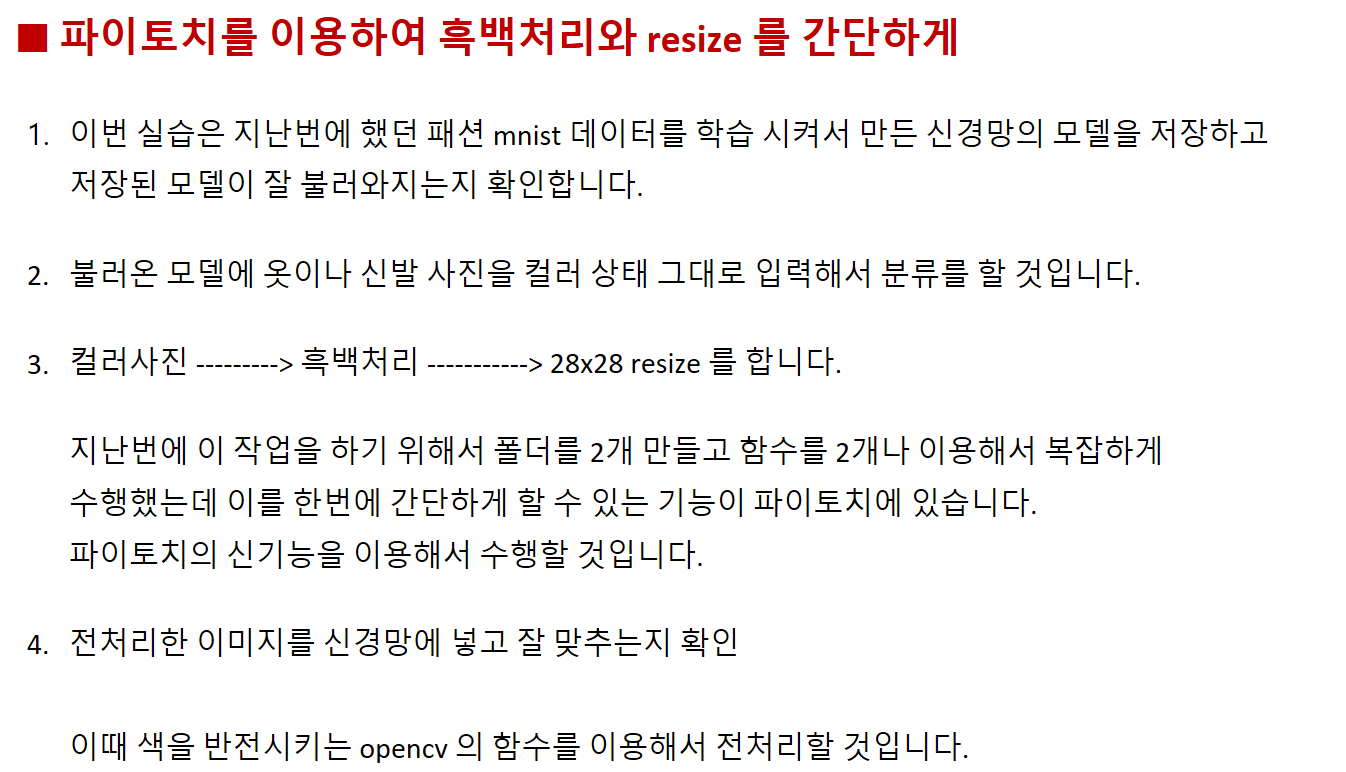

In [ ]:
########### 테스트할 이미지를 올리기 위해 코렙과 구글 드라이브를 연동합니다.   ###########

from google.colab import drive
drive.mount('/content/drive')

In [3]:
##################  만들어진 모델이 잘 불러와지는지 확인합니다.   ##############

# 모델 불러오는 코드

# 1. 모델을 불러옵니다.

from tensorflow.keras.models import load_model

new_model = load_model('/content/drive/MyDrive/pgw_fashion/fashion_model.h5')

# 2. mnist 데이터를 불러옵니다.
import  tensorflow  as  tf
from tensorflow.keras.datasets.fashion_mnist import load_data      # 패션 mnist 데이터를 불러옵니다.

(x_train, y_train), (x_test, y_test) = load_data()           #  훈련과 테스트로 데이터를 불러옵니다.

# 2.1  28x28 의 shape 를 1 x 784 로 변경합니다.

x_train = x_train.reshape(60000,28*28)
x_test  = x_test.reshape(10000, 28*28)

x_train = x_train/255.0          #  정규화
x_test = x_test/255.0             

# 2.2 정답 데이터를 준비합니다. (p98 원핫인코딩을 해야합니다.)
 
from  tensorflow.keras.utils import  to_categorical       # 오차함수에 정답을 제공하기 위해서 one hot encoding 수행

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print ( y_train.shape)  # (60000, 10)

# 3.모델을 평가합니다. (오차, 정확도가 출력됩니다.)

new_model.evaluate(x_test, y_test)

# [0.3982793092727661, 0.8960000276565552]
# 10개중에 9개 맞추는 신경망입니다.


4431872/4422102 [==============================] - 0s 0us/step
(60000, 10)
313/313 [==============================] - 1s 2ms/step - loss: 0.3983 - acc: 0.8960


[0.3982793092727661, 0.8960000276565552]

In [ ]:
###### 4. /content/drive/MyDrive/pgw_fashion 밑에 아래의 dress.jpg 이미지를 올립니다. ############

# 칼라 사진임..
# fashion mnist 는 배경은 검정이고 흑백으로 옷이 처리되어있다.
# 쉽게 파일을 바꿔줘보자.


In [4]:
################# 5. dress.jpg 를 흑백처리하고 28x28 로 resize 합니다. ###################
# 파이토치의 새로운 기능

%cd /content/drive/MyDrive/pgw_fashion
# 이동

import torch              # 코랩은 알아서 pip 으로 torch 를 설치하고 import 합니다.
import torchvision.transforms as transforms         
import cv2
import matplotlib.pyplot as plt

img_size = (28,28)            # resize 할 가로, 세로 사이즈를 img_size 변수에 할당
img_path = 'dress.jpg'      # 신경망 넣을 이미지 파일명을 img_path 에 할당

img = cv2.imread(img_path)          # 이미지를 숫자로 변환합니다.
img = cv2.bitwise_not(img)          # 색을 반전시키는 코드인데 하얀색-->검정색 , 검정색 --> 하얀색
print(img.shape)                         # ( 683, 427, 3 ) : 가로 683, 세로 427, 채널3은 rgb 컬러사진
print(img[:, :, ::-1].shape)           # (683, 427, 3) : 원본이미지 bgr ----> rgb 로 채널 변경

plt.figure(figsize=(16, 10))
#plt.imshow(img)
#plt.imshow(img[:, :, ::-1]) # BGR ---> RGB

T = transforms.Compose([                                # 이미지 전처리를 시작합니다.
    transforms.ToPILImage(),                             # 이미지를 Pillow 형태로 변경합니다.
    transforms.Grayscale(1),                              # 흑백처리 합니다.
    transforms.Resize(img_size),                       # 28x28로 resize 하는 코드
    transforms.ToTensor()                                  # 위에서 전처리한 이미지 데이터를 텐써형태(다차원배열)로 변환합니다.
])

img_input = T(img)        # 이미지 전처리 T 객체에 img 이미지를 넣어서 전처리된 결과를 img_input에 넣고 shape 를 봅니다. 
print(img_input.shape)        

# 결과 : torch.Size([ 1, 28, 28 ])    파이토치의 자료구조로 감싼 다차원 배열이 출력되었습니다.
#  흑백이라서 맨앞에 1


/content/drive/MyDrive/pgw_fashion
(683, 427, 3)
(683, 427, 3)
torch.Size([1, 28, 28])


<Figure size 1152x720 with 0 Axes>

In [5]:
############### 6. 전처리한 데이터를 신경망에 넣고 예측합니다. ##################

import numpy as np
img_input.shape  

x = img_input.reshape(1,784)        # 패션mnist 신경망의 input 사이즈 맞게 reshape 합니다.
print(np.array(x).shape)
x = np.array(x)                     # 파이토치 잘구조 ----> numpy array로 변경

results = new_model.predict(x)               # 불러온 모델에 x 값을 넣고 예측합니다.
np.argmax(results)                                   # 최대원소값의 인덱스 번호를 출력  : 3



(1, 784)


3

In [6]:
################### 8. 어떤 패션인지 확인합니다. ###############

target_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

target_dict[3]                   # Dress


'Dress'